In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [5]:
train_data = train_data.reshape(-1, 784) / 255.0
test_data = test_data.reshape(-1, 784) / 255.0

In [7]:
train_label = utils.to_categorical(train_label)
test_label = utils.to_categorical(test_label)

In [12]:
model = models.Sequential()

model.add(layers.Dense(input_dim = 28 * 28, units = 256, activation=None, kernel_initializer=initializers.he_uniform))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate = 0.2))

model.add(layers.Dense(units = 256, activation=None, kernel_initializer=initializers.he_uniform))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate = 0.2))

model.add(layers.Dense(units = 10, activation='softmax'))

In [13]:
model.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=[metrics.categorical_accuracy])

In [14]:
history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Epoch 1/15
480/480 [==============================] - 1s 2ms/step - loss: 0.3092 - categorical_accuracy: 0.9062 - val_loss: 0.1353 - val_categorical_accuracy: 0.9605
Epoch 2/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1404 - categorical_accuracy: 0.9572 - val_loss: 0.0961 - val_categorical_accuracy: 0.9712
Epoch 3/15
480/480 [==============================] - 1s 2ms/step - loss: 0.1012 - categorical_accuracy: 0.9690 - val_loss: 0.0875 - val_categorical_accuracy: 0.9747
Epoch 4/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0808 - categorical_accuracy: 0.9741 - val_loss: 0.0784 - val_categorical_accuracy: 0.9772
Epoch 5/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0709 - categorical_accuracy: 0.9771 - val_loss: 0.0804 - val_categorical_accuracy: 0.9746
Epoch 6/15
480/480 [==============================] - 1s 2ms/step - loss: 0.0594 - categorical_accuracy: 0.9803 - val_loss: 0.0745 - val_categorical_accuracy: 0.9779
Epoc

In [15]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 0s 953us/step - loss: 0.0748 - categorical_accuracy: 0.9808
loss (cross-entropy) : 0.0747748464345932
test accuracy : 0.9807999730110168


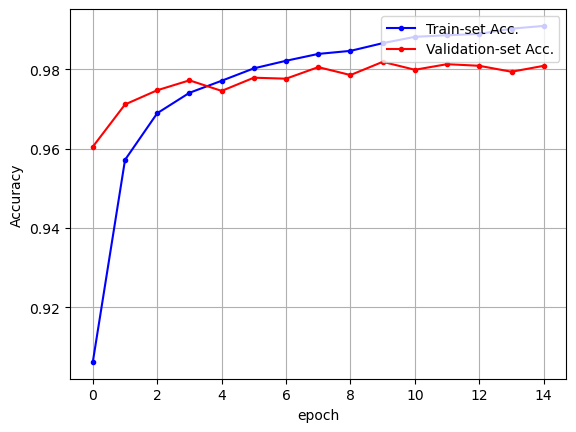

In [16]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()